## Image classification with convolutional Neural Networks

### Import necessary modules

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto
print(tf.__version__)

2.13.0


### Load dataset

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info = True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [6]:
metadata.splits

{'train': <SplitInfo num_examples=60000, num_shards=1>,
 'test': <SplitInfo num_examples=10000, num_shards=1>}

### Explore dataset

In [8]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
num_train_examples

60000

### Preprocess the data

In [10]:
def normalize(images,labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

### Visualize an images

2024-02-18 07:46:13.498847: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


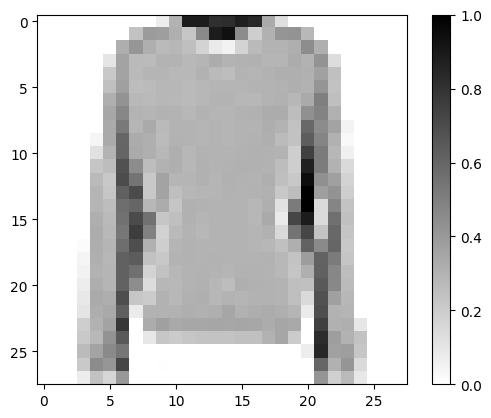

In [18]:
for image, label in train_dataset.take(1):
    break
image = image.numpy().reshape((28, 28))

plt.figure();
plt.imshow(image, cmap = plt.cm.binary);
plt.colorbar()
plt.grid(False)
plt.show();

2024-02-18 07:52:14.598408: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


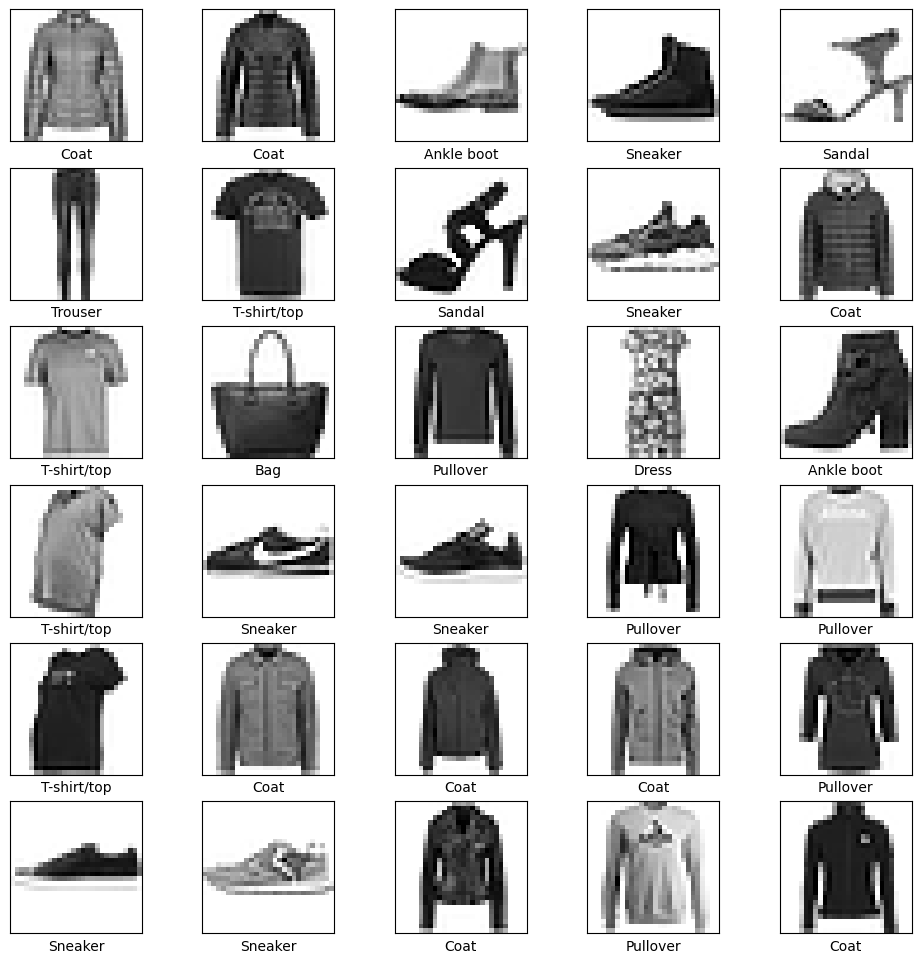

In [25]:
plt.figure(figsize = (12, 12))

for i, (images, labels) in enumerate(test_dataset.take(30)):
    images = images.numpy().reshape((28, 28))
    
    plt.subplot(6, 5, i+1)
    plt.imshow(images, cmap = plt.cm.binary)
#     plt.colorbar()
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[labels])
    plt.grid(False)
plt.show()

### Build the model

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu,
                          input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu,
                          input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Train model